In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("finalProject.ipynb")

# Final Project: Regression Inference & Classification

Welcome to the Final Project for Data Science for All!  This is the final project for our course and with this project you will get to explore a dataset of your choice. By the end of the project, you will have some experience with:

1. Finding a dataset of interest.
2. Performing some exploratory analysis using linear regression and inference.
3. Building a k-nearest-neighbors classifier.
4. Testing a classifier on data.

### Logistics

**Rules.** Don't share your code with anybody. You are welcome to discuss your project with other students, but don't share your project details or copy a project from the internet. This project should be YOUR OWN (code, etc.). If you do base your project on something you learned online or through a generative AI tool such as ChatGPT, make sure to check with your instructor before getting started and reference your sources as part of this project. The experience of solving the problems in this project will prepare you for the final exam (and life). During the final lab session, you will have a chance to share with the whole class.

**Support.** You are not alone! Come to lab hours, tutoring hours, office hours, and talk to your classmates. If you're ever feeling overwhelmed or don't know how to make progress, we are here to help! Don't hesitate to send an email. 

**Advice.** Develop your project incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. Don't hesitate to add more names/variables or functions if this helps with your analysis or classifier development. Also, please be sure to not re-assign variables throughout the notebook! For example, if you use max_temperature in your answer to one question, do not reassign it later on.

To get started, load `datascience`, `numpy`, and `plots`.

**Reading**: 

* [Inference for Regression](https://www.inferentialthinking.com/chapters/16/Inference_for_Regression.html)

* [Classification](https://www.inferentialthinking.com/chapters/17/Classification.html)

In [3]:
# Don't change this cell; just run it. If you need additional libraries for your project, you can add them to this cell.

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets


# 1. Picking a Dataset

In this project, you are exploring a dataset of your choice. 
The dataset should be large enough: multiple individuals (rows) with multiple attributes (columns) such that we can try to make a prediction based on the known information in this dataset using linear regression and/or classification.
In this first section you will:
- find a data set that you are interested in
- record the source of where you found it
- save it as a .csv file in the same folder as your jupyter notebook.
- make sure you can read it in as a table and that your dataset represents a large enough sample for investigating the possible use of regression inference and clasification
- Explore the data using visualization techniques learned in this course
- Formulate what (which attributes) you would like to investigate using a linear regression model
- Formulate what question you would like to answer with a classifier based on this dataset. For example: (1) Is this movie a thriller or a comedy? (2) Is this amazon order Fraudulant or not? (3) Does this patient have cancer or not? See section in the book for more details on [Classification](https://www.inferentialthinking.com/chapters/17/Classification.html) 
- Discuss your choice with you instructor and get approval to get started with section 2

*Note 1: If you need guidance on where and how to find a dataset, ask your instructor for help!*

*Note 2: Your final project conclusion does not necessarily need to show that you have a good regression model or classifier to make predictions! What is important is your own analysis of its potential and limitations when investigating the dataset for making predictions using these techniques*



**Question 1.1** In the cell below:
1. Read in the dataset you chose as a table
2. Edit the comment to describe where you found this dataset

In [4]:
# I found this data set on github when I searched up atp tour tennis csv's
# Load your dataset into a table
#https://github.com/JeffSackmann/tennis_atp

my_data_raw = Table().read_table("atp_matches_2023.csv")
my_data_raw

tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
2023-9900,United Cup,Hard,18,A,20230102,300,126203,3,nan,Taylor Fritz,R,196,USA,25.1,126610,5,nan,Matteo Berrettini,R,196,ITA,26.7,7-6(4) 7-6(6),3,F,135,15,2,85,52,45,16,12,0,0,7,2,97,62,47,15,12,9,9,9,3355,16,2375
2023-9900,United Cup,Hard,18,A,20230102,299,126207,nan,nan,Frances Tiafoe,R,188,USA,24.9,207518,nan,nan,Lorenzo Musetti,R,185,ITA,20.8,6-2 0-0 RET,3,F,34,3,1,27,19,15,3,4,3,3,0,0,21,12,8,3,4,1,3,19,2000,23,1865
2023-9900,United Cup,Hard,18,A,20230102,296,126203,3,nan,Taylor Fritz,R,196,USA,25.1,128034,2,nan,Hubert Hurkacz,R,196,POL,25.8,7-6(5) 7-6(5),3,SF,104,11,0,80,50,44,19,12,4,4,17,1,82,62,51,7,12,2,2,9,3355,10,2905
2023-9900,United Cup,Hard,18,A,20230102,295,126207,nan,nan,Frances Tiafoe,R,188,USA,24.9,200390,nan,nan,Kacper Zuk,R,183,POL,23.9,6-3 6-3,3,SF,79,5,4,61,37,31,11,9,5,5,3,3,68,41,26,12,9,6,9,19,2000,245,220
2023-9900,United Cup,Hard,18,A,20230102,292,126774,1,nan,Stefanos Tsitsipas,R,193,GRE,24.3,126610,5,nan,Matteo Berrettini,R,196,ITA,26.7,4-6 7-6(2) 6-4,3,SF,155,9,1,98,52,43,28,16,1,2,7,2,89,58,48,18,16,1,2,4,5550,16,2375
2023-9900,United Cup,Hard,18,A,20230102,291,207518,nan,nan,Lorenzo Musetti,R,185,ITA,20.8,208852,nan,nan,Stefanos Sakellaridis,R,196,GRE,18.3,6-1 6-1,3,SF,62,2,1,41,25,18,12,7,1,1,2,1,43,26,15,5,7,4,9,23,1865,803,23
2023-9900,United Cup,Hard,18,A,20230102,288,126774,1,nan,Stefanos Tsitsipas,R,193,GRE,24.3,106432,8,nan,Borna Coric,R,188,CRO,26.1,6-0 6-7(4) 7-5,3,RR,151,20,1,94,60,45,20,15,5,6,7,2,88,59,44,10,15,2,7,4,5550,26,1685
2023-9900,United Cup,Hard,18,A,20230102,287,127339,nan,nan,Borna Gojo,R,196,CRO,24.8,208852,nan,nan,Stefanos Sakellaridis,R,196,GRE,18.3,6-4 6-2,3,RR,89,4,1,50,30,27,11,9,1,1,4,1,78,50,30,12,9,6,9,144,381,803,23
2023-9900,United Cup,Hard,18,A,20230102,284,126610,5,nan,Matteo Berrettini,R,196,ITA,26.7,128034,2,nan,Hubert Hurkacz,R,196,POL,25.8,6-4 3-6 6-3,3,RR,116,11,1,77,49,37,18,14,2,4,12,1,79,49,36,16,14,1,4,16,2375,10,2905
2023-9900,United Cup,Hard,18,A,20230102,283,207518,nan,nan,Lorenzo Musetti,R,185,ITA,20.8,207415,nan,nan,Daniel Michalski,R,180,POL,22.9,6-1 6-1,3,RR,57,8,0,31,18,17,11,7,0,0,1,1,40,28,12,5,7,4,9,23,1865,260,204


In [5]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2:** In the following cell, describe each of the variables in the dataset.  Are they categorical or numerical? How many observations are there?  Add a code cell below this to show how you found the correct number of observations programmatically.


In [6]:
my_data_raw.num_rows

2986

There are 2986 observations in this data set. Some of the vars such as tourney_name, tourney_level,
winner_name, winner_ioc, etc are catagorical vars. Others such as match_num, winner_seed,
winner_ht are numerical.

<!-- END QUESTION -->

**Question 1.3:** The dependent or response variable of interest is the variable that we will try to classify later in this project.  This is the variable that should have two levels that will be used in classification later.  

For example: (1) Is this movie a thriller or a comedy? (2) Is this amazon order Fraudulent or not? (3) Does this patient have cancer or not? See section in the book for more details on [Classification](https://www.inferentialthinking.com/chapters/17/Classification.html).  

In the code cell below, make any necessary adjustments to your data so that the variable is formatted in this way.  Then assign the variable `var` to the column `label` of your table that contains the observations of this variable (note: the label should be a string, so don't forget the quotes!)


In [7]:
# dependent or response variable; Match Winner: Predict whether there is a likely upset.
# this creates a column that is true if there was an upset, an upset happens in a player beats another player who is ranked ten spots or more higher than himself.
#(my_data_raw.column('winner_rank') > (my_data_raw.column('loser_rank') + 10))
my_data_raw = my_data_raw.with_column('upset_happened', my_data_raw['winner_rank'] > (my_data_raw['loser_rank'] + 10))

# Define a major upset: someone ranked outside the top 10 beats someone ranked inside the top 10
major_upset_condition = (my_data_raw['winner_rank'] > 10) & (my_data_raw['loser_rank'] <= 10)

# Add the new column 'major_upset_happened' to the dataset
my_data_raw = my_data_raw.with_column('major_upset_happened', major_upset_condition)

var = 'major_upset_happened'
my_data_raw.select(var)

major_upset_happened
False
False
False
False
False
False
False
False
True
False


In [8]:
grader.check("q1_3")

q1_3 results: All test cases passed!

In [9]:
upset = 'upset_happened'
major_upset = 'major_upset_happened'

my_data_raw.select(upset)

my_data_raw.select(major_upset)

#num upset %
100 * my_data_raw.where(upset, are.equal_to(True)).num_rows / my_data_raw.num_rows

30.84393837910248

In [10]:
# num major upset %
100 * my_data_raw.where(major_upset, are.equal_to(True)).num_rows / my_data_raw.num_rows

4.48760884125921

Now, we are ready to investigate our data visually!

**Question 1.4:** Think about the numerical variables in the dataset that might be related to each other.  In the cell below, make three different scatter plots that show the relationship between different variables while also displaying how each case is classified.  

Use the following line of code:

**my_data.scatter(`Column 1`, `Column 2`, group=`label`)**

Replace `Column 1` and `Column 2` with the correct column names of numerical variables(features) you would like to investigate. Replace `label` with the column name of the categorical variable you would like to try to classsify.

Note: The commented code in the cell below is sample code for this.

<!-- BEGIN QUESTION -->



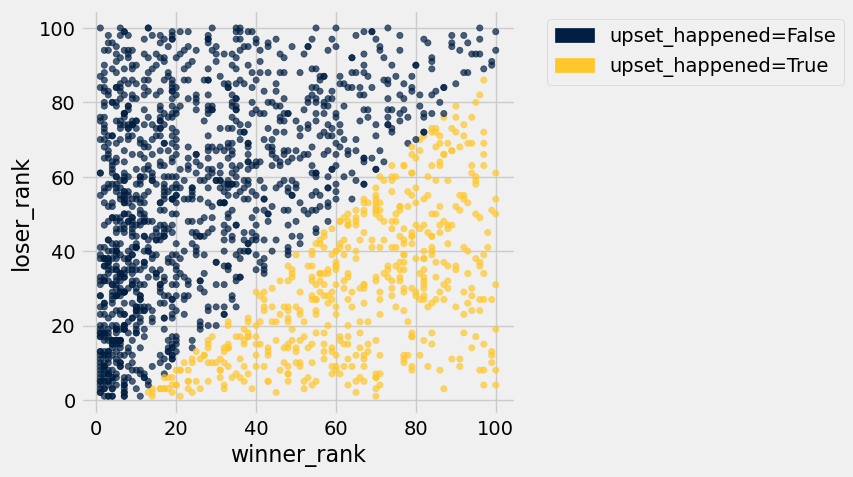

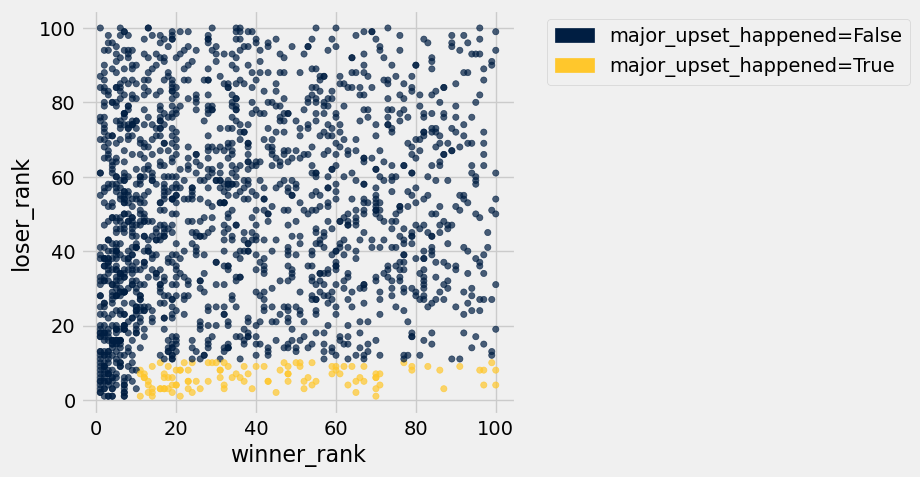

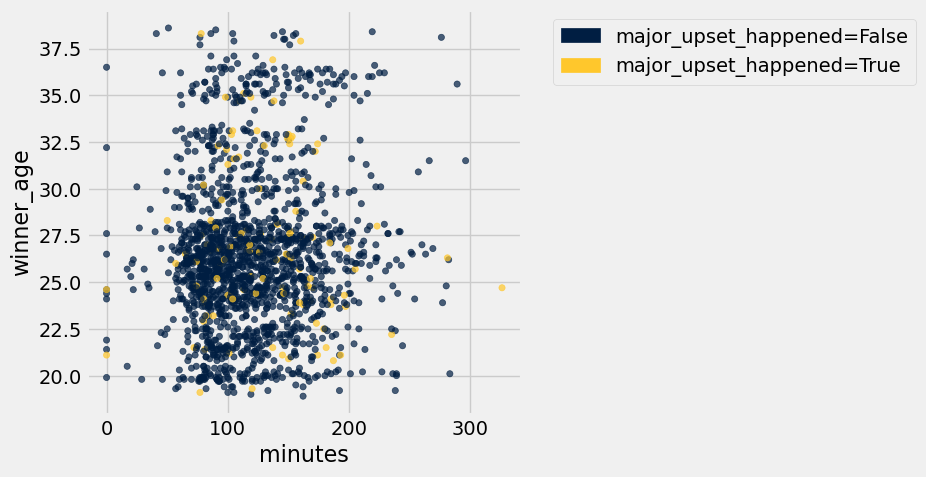

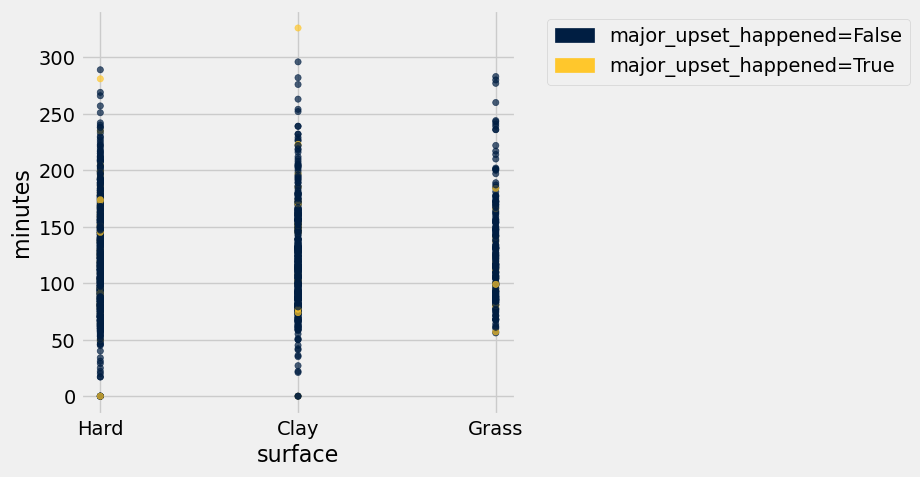

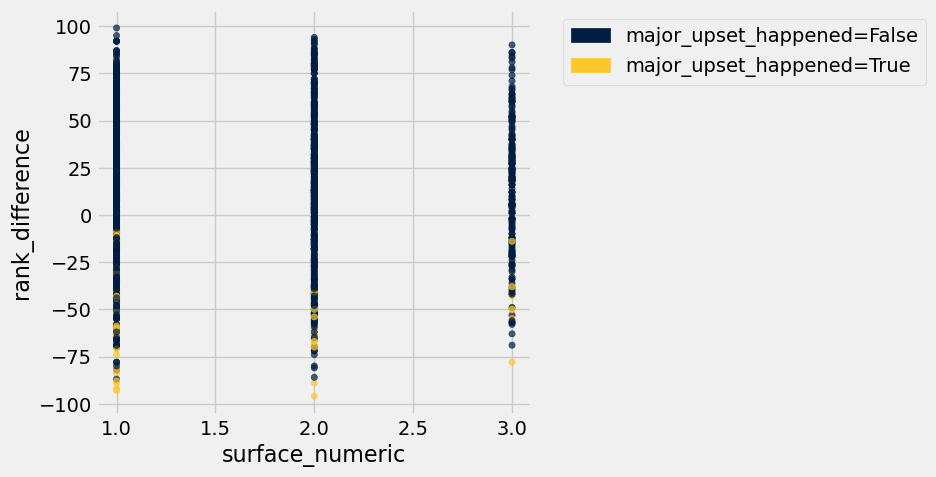

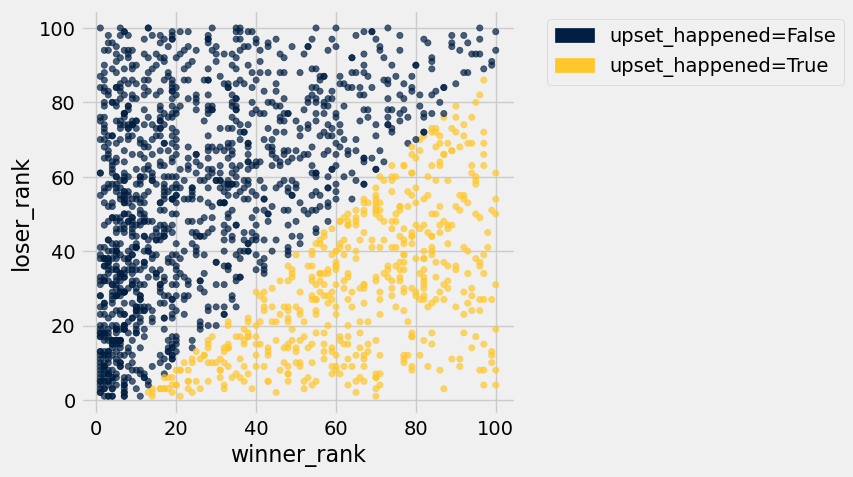

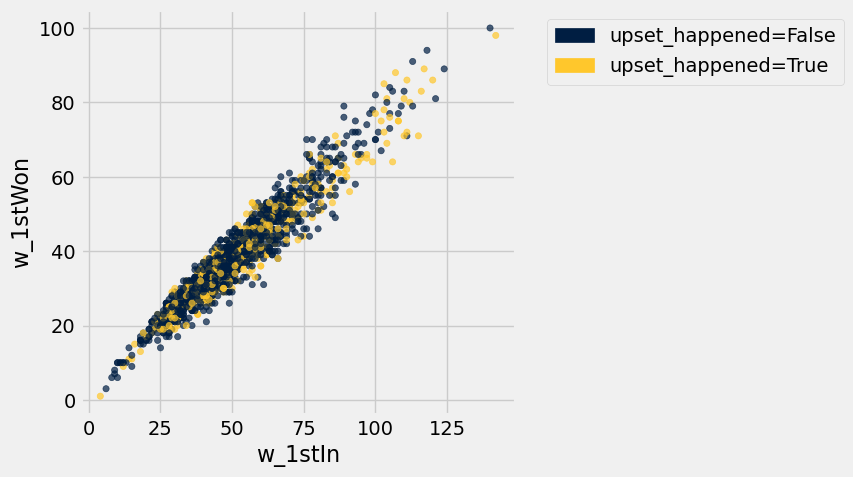

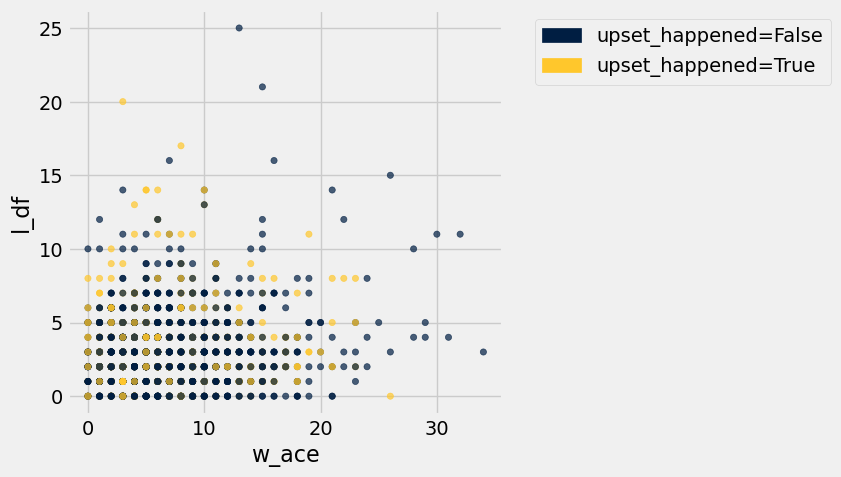

In [46]:
# Here is the code placeholder to use, uncomment the line and adjust according to the names if the columns in your dataset:
# my_data.scatter("Column 1", "Column 2", group="label")


my_data = my_data_raw.where('winner_rank', are.below_or_equal_to(100))
my_data = my_data.where('loser_rank', are.below_or_equal_to(100))
# 0.1. 
my_data.scatter("winner_rank", "loser_rank", group="upset_happened")
#shows 30% vs 4 %
my_data.scatter("winner_rank", "loser_rank", group="major_upset_happened")
#To observe how rank differences relate to the likelihood of an upset. This can highlight clusters where upsets are more common.

# 0.2.
my_data.scatter("minutes", "winner_age", group="major_upset_happened")
#To analyze whether the winner's age affects match duration, especially during upsets. Younger players might recover better in longer matches.


surface_encoding = {"Hard": 1, "Clay": 2, "Grass": 3}
surface_numeric = np.vectorize(surface_encoding.get)(my_data["surface"])
# Add the new column to the dataset
my_data = my_data.with_column("surface_numeric", surface_numeric)

# 0.3.
my_data.scatter("surface", "minutes", group="major_upset_happened")

rank_difference = my_data["loser_rank"] - my_data["winner_rank"]
my_data = my_data.with_column("rank_difference", rank_difference)
my_data.scatter("surface_numeric", "rank_difference", group="major_upset_happened")


# 1.  Winner’s Rank vs. Loser’s Rank, upset
my_data.scatter("winner_rank", "loser_rank", group="upset_happened")
#2. winner first serve in vs. winner first serve won
my_data.scatter("w_1stIn", "w_1stWon", group="upset_happened")
#3. Winner’s Aces vs. Loser’s Double Faults
my_data.scatter("w_ace", "l_df", group="upset_happened")



<!-- END QUESTION -->

**Question 1.5** Describe the three plots from the last question.  For each plot, note whether the relationship appears to be linear and whether it is a positive or negative association.  Which of the three plots will you look at for linear regression?



1. Winner’s Rank vs. Loser’s Rank
Relationship: Likely linear. Higher-ranked winners (lower numerical rank) often compete against similarly ranked losers. Upsets might deviate from this pattern.
Association: Positive. As the winner’s rank increases (lower performance), the loser’s rank also increases.
Use for Linear Regression: Yes, as the relationship is linear with a clear trend.

2. winner first serve in vs. winner first serve won
Relationship:Likely linear, as players who get more first serves in tend to win more points on their first serve. 
Use for Linear Regression: yes since it shows a strong positive linear trend. I am using this one.


3. Winner’s Aces vs. Loser’s Double Faults
Relationship: Potentially linear. Matches with more aces from winners might correlate with more double faults from losers, as losing players are under pressure.
Association: Positive. Higher aces from winners might correspond to higher double faults from losers.
Use for Linear Regression:not sure since the points might form clear trend.

Question: Can we predict the amount of first serve points won in a match given the amount of first serves made. 

<!-- END QUESTION -->

**Question 1.6** In the cell below, formulate the question you would like to try to answer with a classifier that you plan to build.

Predict whether there will be a major upset or not.

<!-- END QUESTION -->

**Question 1.7** Set the variable **instructor_signed_off** to 'YES' if you have checked in with your instructor during lab hours.

In [12]:
instructor_signed_off = "YES"

In [13]:
grader.check("q1_7")

q1_7 results: All test cases passed!

# 2. Regression Inference

To get started, reduce the table with relevant data that you would like to use to evaluate a linear regression model to make a prediction. In this section, you will evaluate this model and set up a hypothesis test to check if there is true correlation/linear association. You will analyze residuals, confidence interval and prediction lines of best fit.

**Question 2.1** Copy the cell where you loaded the dataset in section 1, reduce the table to only include the relevant data for what you would like to use in your regression model. The table should only have 2 columns of intest since this is simple linear regression.

In [14]:
# Copy the cell where you loaded the dataset in section 1 and reduce the table to only include the relevant data for linear regression
# You may have to clean your data to get rid of outliers

my_data = my_data_raw.select("w_1stIn", "w_1stWon")
my_data = my_data.where("w_1stIn", are.above_or_equal_to(0))  # Removing invalid ranks
my_data = my_data.where("w_1stWon", are.above_or_equal_to(0))   # Removing invalid ranks

my_data.show(5)


w_1stIn,w_1stWon
52,45
19,15
50,44
37,31
52,43


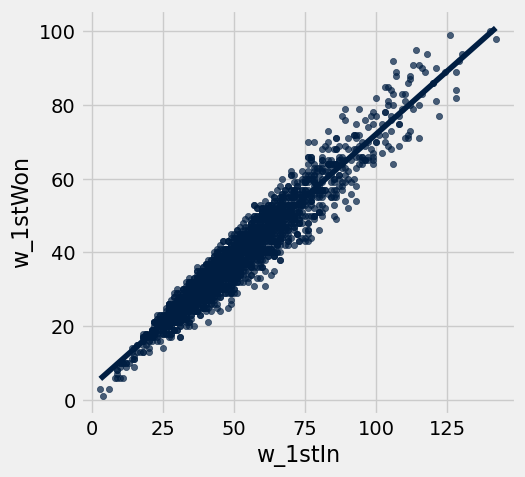

In [15]:
# As usual, let's investigate our data visually before analyzing it numerically. 
# Just run this cell to plot the relationship between the 2 attribute/columns.
# The scatter plot should look similar to the one you plotted for 1.4. 
my_data.scatter(0, 1, fit_line=True)

In [16]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2:**

Use the functions given to assign the correlation between the 2 attributes to the variable `cor`.

The function `correlation` takes in three arguments, a table `tbl` and the labels of the columns you are finding the correlation between, `col1` and `col2`.


In [17]:
def standard_units(arr):
    return (arr- np.mean(arr)) / np.std(arr)

def correlation(tbl, col1, col2):
    r = np.mean(standard_units(tbl.column(col1)) * standard_units(tbl.column(col2)))
    return r

cor = correlation(my_data, "w_1stIn", "w_1stWon")
cor

0.96222272841593814

In [18]:
grader.check("q2_2")

q2_2 results: All test cases passed!

Can you see a correlation between the 2 variables? If in this sample, we found a linear relation between the two variables, would the same be true for the population? Would it be exactly the same linear relation? Could we predict the response of a new individual who is not in our sample?

**Question 2.3: Writing Hypotheses.**

Suppose you think the slope of the true line of best fit for the 2 variables is not zero: that is, there is some correlation/association between them. To test this claim, we can run a hypothesis test! Define the null and alternative hypothesis for this test.


If we reject the null hypothesis, it suggests that there is a significant linear relationship between winner_rank and loser_rank.
If we fail to reject we conclude that there is no evidence of a linear association between the two variables.

<!-- END QUESTION -->

**Question 2.4:**

Maria says that instead of finding the slope for each resample, we can find the correlation instead, and that we will get the same result. Why is she correct? What is the relationship between slope and correlation?


Maria is correct because the slope of the regression line and the correlation coefficient are related. The relationship between these two comes from the formula for the slope in a simple linear regression.

<!-- END QUESTION -->

**Question 2.5:** Define the function `one_resample_r` that performs a bootstrap and finds the correlation between the 2 variables in the resample. `one_resample_r` should take three arguments, a table `tbl` and the labels of the columns you are finding the correlation between, `col1` and `col2`.



In [19]:
def one_resample_r(tbl, col1, col2):
    resampled_tbl = tbl.sample(with_replacement=True)
    return correlation(resampled_tbl, col1, col2)

# Uncomment the line of code below and change `Column 1` and `Column 2` to match your dataset.

one_resample = one_resample_r(my_data, "w_1stIn", "w_1stWon")
one_resample

0.96141454751373601

In [20]:
grader.check("q2_5")

q2_5 results: All test cases passed!

**Question 2.6:**
Generate 1000 bootstrapped correlations for the 2 variables, store your results in the array `resampled_correlations`, and plot a histogram of your results.


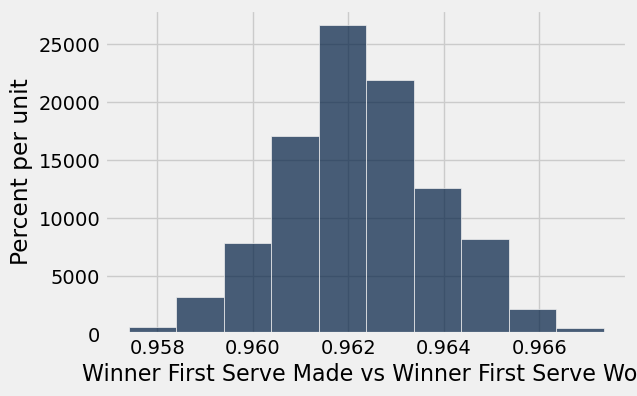

In [21]:
resampled_correlations = []

for i in range(1000):
    resample = my_data.sample(with_replacement=True) 
    r = correlation(resample, "w_1stIn", "w_1stWon")  
    resampled_correlations.append(r)  

# Convert to a np array
resampled_correlations = np.array(resampled_correlations)
    
# Uncomment the line of code below and change column names to match your dataset
Table().with_column("Winner First Serve Made vs Winner First Serve Won", resampled_correlations).hist()

In [22]:
grader.check("q2_6")

q2_6 results: All test cases passed!

**Question 2.7:** Calculate a 95% confidence interval for the resampled correlations and assign either `True` or `False` to `reject` if we can reject the null hypothesis or if we cannot reject the null hypothesis using a 5% p-value cutoff.


In [23]:
lower_bound = np.percentile(resampled_correlations, 2.5)  
upper_bound = np.percentile(resampled_correlations, 97.5)  

reject = True

# Don't change this!
print(f"95% CI: [{lower_bound}, {upper_bound}] , Reject the null: {reject}")


95% CI: [0.9590420245727159, 0.9654316924310629] , Reject the null: True


## Analyzing Residuals

Next, we want to make a prediction for one variable (call this your y variable, or var2) based on the the other (call this your x variable, or var1). First, let's investigate how effective our predictions are.

**Question 2.8:**

Calculate the slope and intercept for the line of best fit for the 2 variables. Assign these values to `my_slope`, and `my_intercept`respectively. The function `parameters` returns a two-item array containing the slope and intercept of a linear regression line.

*Hint 1: Use the `parameters` function with the arguments specified!*

*Hint 2: Remember we're predicting the 2nd variable **based off** a first variable. That should tell you what the `colx` and `coly` arguments you should specify when calling `parameters`.*


In [24]:
# DON'T EDIT THE PARAMETERS FUNCTION
def parameters(tbl, colx, coly):
    x = tbl.column(colx)
    y = tbl.column(coly)
    
    r = correlation(tbl, colx, coly)
    
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_sd = np.std(x)
    y_sd = np.std(y)
    
    slope = (y_sd / x_sd) * r
    intercept = y_mean - (slope * x_mean)
    return make_array(slope, intercept)

my_slope, my_intercept = parameters(my_data, "w_1stIn", "w_1stWon")
my_slope, my_intercept


(0.68506939369612163, 3.6433119465226227)

**Question 2.9:**

Draw a scatter plot of the residuals with the line of best fit for the 2 variables.

*Hint: We want to get the predictions for every data point in the dataset*

*Hint 2: This question is really involved, try to follow the skeleton code!*


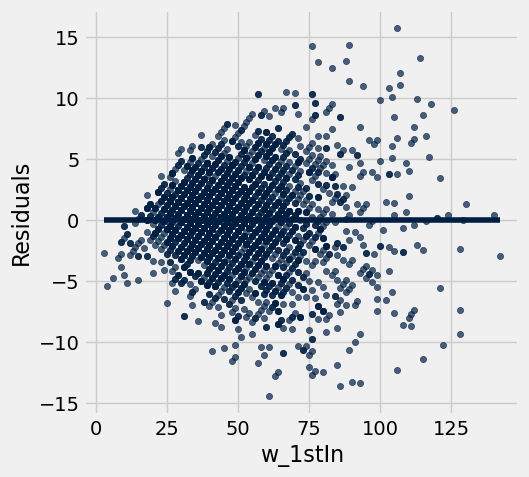

In [25]:
predicted_var2 = my_slope * my_data.column("w_1stIn") + my_intercept
residuals_var2 = my_data.column("w_1stWon") - predicted_var2
originalTable_with_residuals = my_data.with_column("Residuals", residuals_var2)
originalTable_with_residuals.scatter("w_1stIn", "Residuals", fit_line=True)

# Now generate a scatter plot of the residuals!
# Uncomment the line of code below and change "Column 1" to match variable 1 used in your linear regression analysis
#originalTable_with_residuals.scatter("Column 1", "Residuals")

Here's a [link](https://www.inferentialthinking.com/chapters/15/6/Numerical_Diagnostics.html) to properties of residuals in the textbook that could help out with some questions.

**Question 2.10 :**

Based on the plot of residuals, do you think linear regression is a good model in this case? Explain.



The residuals appear to be randomly scattered around 0. This suggests that the relationship between the variables can be approximated well by a linear model. There also doesn’t seem to be any clear pattern in the residuals, which supports the appropriateness of a linear regression model.

<!-- END QUESTION -->

#### Question 2.11

Is the correlation between the residuals and your predictor positive, zero, or negative?  Assign `residual_corr` to either 1, 2 or 3 corresponding to whether the correlation between the residuals and your predictor is positive, zero, or negative.  Hint: it is ok to check this with Python before answering!


1. Positive
2. Zero
3. Negative


In [26]:
residual_corr = 2


In [27]:
grader.check("q2_11")

q2_11 results: All test cases passed!

## Prediction Intervals

Now, Maria wants to predict the 2nd variable based on a chosen first variable x. 

**Question 2.12:** First, let's identify a value of your choice for x that you want to predict y with and explain in your own words why you chose that value. 

First Serve in = 75: How many service points were won by a winner of an atp tour match if he made 75 first serves? 75 serves is a pretty stander number of first serves to make in a match

<!-- END QUESTION -->

**Question 2.13:**

Define the function `one_resample_prediction` that generates a bootstrapped sample from the `tbl` argument, calculates the line of best fit for `ycol` vs `xcol` for that resample, and predicts a value based on `xvalue`. Then assign the value you chose for x in Question 2.12 to `chosen_var1`.

*Hint: Remember you defined the `parameters` function earlier*


In [28]:
def one_resample_prediction(tbl, colx, coly, xvalue):
    resample = tbl.sample(with_replacement=True)
    slope, intercept = parameters(resample, colx, coly)
    predicted_y = slope * xvalue + intercept   
    return predicted_y

maria_prediction = one_resample_prediction(my_data, "w_1stIn", "w_1stWon", 75)
maria_prediction


55.29394751108471

In [29]:
grader.check("q2_13")

q2_13 results: All test cases passed!

Around 55 points were won out of 75

**Question 2.14:**

Assign `resampled_predictions` to be an array that will contain 1000 resampled predictions for the 2nd variable based on `chose_var1` that you picked, and then generate a histogram of it.


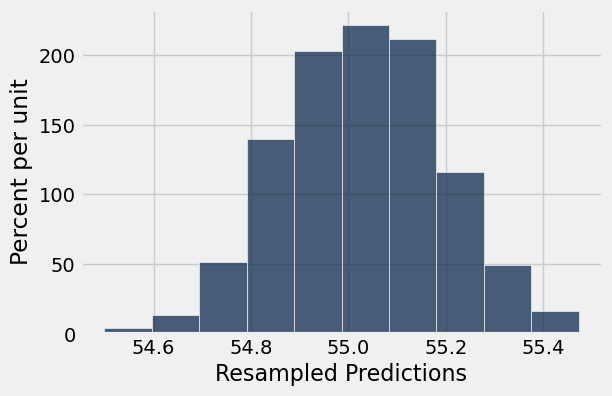

In [30]:
resampled_predictions = []

chosen_var1 = 75

for i in range(1000):
    prediction = one_resample_prediction(my_data, "w_1stIn", "w_1stWon", chosen_var1)
    resampled_predictions.append(prediction)

resampled_predictions = np.array(resampled_predictions)

# Don't change/delete the code below in this cell, just run to visualize the distribution
Table().with_column("Resampled Predictions", resampled_predictions).hist()

**Question 2.15:**

Using `resampled_predictions` from Question 2.14, generate a 99% confidence interval for Maria's prediction.


In [31]:
lower_bound_maria = np.percentile(resampled_predictions, 2.5)  
upper_bound_maria = np.percentile(resampled_predictions, 97.5)  


# Don't delete/modify the code below in this cell
print(f"99% CI: [{lower_bound_maria}, {upper_bound_maria}]")

99% CI: [54.72955258144908, 55.35504354825208]


In [32]:
grader.check("q2_15")

q2_15 results:
    q2_15 - 1 result:
        ❌ Test case failed
        Trying:
            all([type(lower_bound_maria) in set([float, np.float32, np.float64]), 
        Expecting nothing
        **********************************************************************
        Line 1, in q2_15 0
        Failed example:
            all([type(lower_bound_maria) in set([float, np.float32, np.float64]), 
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2_15 0[0]>", line 1
                all([type(lower_bound_maria) in set([float, np.float32, np.float64]), 
                    ^
            SyntaxError: '[' was never closed
        Trying:
            type(upper_bound_maria) in set([float, np.float32, np.float64])])
        Expecting:
            True
        **********************************************************************
        Line 2, in q2_15 0
        Failed example:
            type(upper_bound_maria) in set([float, np.float32, np.float64])])
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2_15 0[1]>", line 1
                type(upper_bound_maria) in set([float, np.float32, np.float64])])
                                                                               ^
            SyntaxError: unmatched ']'

**Question 2.16:** Uncomment and change the 2 lines of code underneath the TODOs, with the correct `Column 1` and `Column 2`. Then run the following cell to see a few bootstrapped regression lines, and the predictions they make for your chosen value for `chosen_var1` (picked in question 2.13)

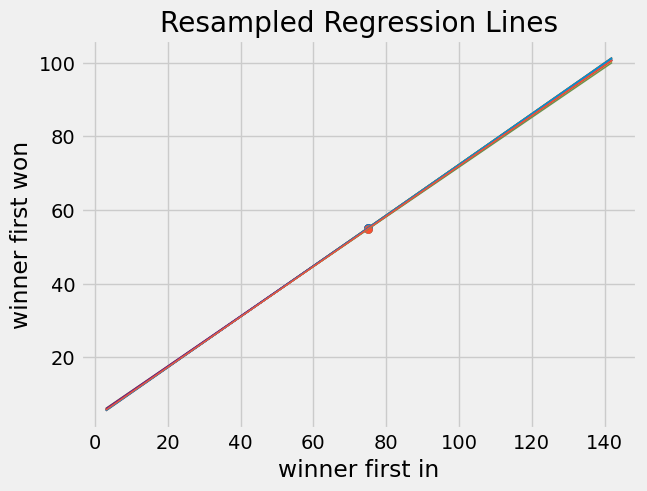

In [35]:
# You don't need to understand all of what it is doing but you should recognize a lot of the code!
lines = Table(['slope','intercept'])

x=chosen_var1 # This is the value you picked in question 2.14

for i in np.arange(20):
    resamp = originalTable_with_residuals.sample(with_replacement=True)
    # TODO: change Column 1 and Column 2 in the line below and uncomment
    resample_pars = parameters(resamp, "w_1stIn", "w_1stWon") 
    slope = resample_pars.item(0)
    intercept = resample_pars.item(1)
    lines.append([slope, intercept])
    
lines['prediction at x='+str(x)] = lines.column('slope')*x + lines.column('intercept')
# TODO: change Column 1 in the line below and uncomment
xlims = [min(originalTable_with_residuals.column("w_1stIn")), max(originalTable_with_residuals.column("w_1stIn"))]
left = xlims[0]*lines[0] + lines[1]
right = xlims[1]*lines[0] + lines[1]
fit_x = x*lines['slope'] + lines['intercept']
for i in range(20):
    plt.plot(xlims, np.array([left[i], right[i]]), lw=1)
    plt.scatter(x, fit_x[i], s=30)
plt.ylabel("winner first won"); # You can change the label here to be more descriptive
plt.xlabel("winner first in"); # You can change the label here to be more descriptive
plt.title("Resampled Regression Lines");

**Question 2.17**

What are some biases in this dataset that may have affected our analysis? Some questions you can ask yourself are: "is our sample a simple random sample?" or "what kind of data are we using/what variables are we dealing with: are they categorical, numerical, or both (both is something like ordinal data)?".

*Hint: you might want to revisit the beginning of this assignment to reread where your data came from and how the table was generated.*


1. The dataset may not represent a simple random sample of all matches in professional tennis. It likely includes matches from tournaments with varying levels of importance (e.g., Grand Slams vs. lower-tier tournaments). This could introduce selection bias, as higher-ranked players might compete more in top-tier events.
2. The dataset includes matches on different surfaces (Hard, Clay, Grass), which might affect player performance. If some surfaces are overrepresented, the model could be biased toward predictions on that surface.
3. The dataset primarily uses numerical variables, such as first serves in and first serves won. While this allows for linear regression, other factors influencing serve success (e.g., player fatigue, weather, or psychological factors) are not included, potentially leaving out critical context.

<!-- END QUESTION -->

# 3. Classification


**Recommended Reading**: 

* [Classification](https://www.inferentialthinking.com/chapters/17/Classification.html)

This part of the project is about k-Nearest Neighbors classification (kNN), and the purpose is to reinforce the basics of this method. You will be using the same dataset you picked in section one to complete this part.

We will try to classify our data in 2 classes/groups (labels) based on other variables (features) in our dataset. Go back to question 1.4 and review your answer and your visualization. If it helps copy the code for the visualization below.



## 3.1 Splitting the Dataset

**Question 3.1.** Let's begin implementing the k-Nearest Neighbors algorithm. Define the `distance` function, which takes in two arguments: an array of numerical features (`arr1`), and a different array of numerical features (`arr2`). The function should return the [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between the two arrays. Euclidean distance is often referred to as the straight-line distance formula that you may have learned previously. 

In [34]:
def distance(arr1, arr2):
    return np.sqrt(np.sum((arr1 - arr2) ** 2))

# Don't change/delete the code below in this cell
distance_example = distance(make_array(1, 2, 3), make_array(4, 5, 6))
distance_example

5.196152422706632

In [35]:
grader.check("q3_1")

q3_1 results: All test cases passed!

### Splitting the Dataset
We'll do two different kinds of things with the dataset:

1. We'll build a classifier using the data for which we know the associated label; this will teach it to recognize labels of similar coordinate values. This process is known as *training*.
2. We'll evaluate or *test* the accuracy of the classifier we build on data we haven't seen before.

As discussed in [Section 17.2](https://inferentialthinking.com/chapters/17/2/Training_and_Testing.html#training-and-testing), we want to use separate datasets for training and testing. As such, we split up our one dataset into two.

**Question 3.2.** Next, let's split our dataset into a training set and a test set. We will start with the full dataset `my_data_raw` (not the one with just the columns used for regression). The table should contain the variable that will be used in classification, it should look like the table after question 1.3.

Now, let's create a training set with the first 75% of the dataset and a test set with the remaining 25% (e.g. if your dataset has 100 rows, 75 rows will be the training set, 25 rows will be the test set). Remember that assignment to each group should be random, so we should shuffle the table first.

*Hint: as a first step we can **shuffle** all the rows, then use the* `tbl.take` *function to split up the rows for each table*


In [36]:
shuffled_table = my_data_raw.sample(with_replacement=False)
split_index = round(75* my_data_raw.num_rows/100)

train = shuffled_table.take(np.arange(split_index))  # First 75%
test = shuffled_table.take(np.arange(split_index, shuffled_table.num_rows))  # Remaining 25%

print("Training set:\t",   train.num_rows, "examples")
print("Test set:\t",       test.num_rows, "examples")
train.show(5), test.show(5);

Training set:	 2240 examples
Test set:	 746 examples


tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,upset_happened,major_upset_happened
2023-M-DC-2023-FLS-M-SRB-GBR-01,Davis Cup Finals QF: SRB vs GBR,Hard,2,D,20231123,2,104925,nan,nan,Novak Djokovic,R,188,SRB,36.4,111815,nan,nan,Cameron Norrie,L,188,GBR,28.2,6-4 6-4,3,RR,nan,8,1,48,27,24,16,10,0,0,4,1,75,53,35,10,10,10,12,1,11245,18,1940,False,False
2023-560,Us Open,Hard,128,G,20230828,116,106421,3,nan,Daniil Medvedev,R,198,RUS,27.5,105226,nan,nan,Attila Balazs,R,180,HUN,34.9,6-1 6-1 6-0,5,R128,74,8,3,54,36,31,9,10,0,0,0,5,63,45,17,5,10,6,14,3,6260,nan,nan,False,False
2023-560,Us Open,Hard,128,G,20230828,224,106421,3,nan,Daniil Medvedev,R,198,RUS,27.5,207989,1,nan,Carlos Alcaraz,R,183,ESP,20.3,7-6(3) 6-1 3-6 6-3,5,SF,199,9,10,129,83,68,23,20,8,9,0,0,133,93,64,19,18,4,7,3,6260,1,9815,False,False
2023-M-DC-2023-FLS-2-B-M-FRA-SUI-01,Davis Cup Finals RR: FRA vs SUI,Hard,2,D,20230912,1,105173,nan,nan,Adrian Mannarino,L,180,FRA,35.2,208502,nan,nan,Dominic Stricker,L,183,SUI,21,3-6 6-1 6-4,3,RR,nan,6,3,68,36,28,23,13,1,2,8,2,87,56,39,15,13,6,9,34,1286,90,685,False,False
2023-0422,Cincinnati Masters,Hard,64,M,20230814,280,128034,nan,nan,Hubert Hurkacz,R,196,POL,26.5,106432,15,nan,Borna Coric,R,188,CRO,26.7,5-7 6-3 6-3,3,R32,135,10,2,87,47,31,28,15,3,5,2,2,86,45,33,22,15,6,10,20,1685,16,2315,False,False


tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,upset_happened,major_upset_happened
2023-0404,Indian Wells Masters,Hard,128,M,20230306,280,105916,nan,nan,Marton Fucsovics,R,188,HUN,31,144684,nan,nan,Alex Molcan,L,178,SVK,25.2,6-4 6-2,3,R32,78,1,0,42,24,22,14,9,0,0,0,2,51,30,24,8,9,3,6,84,652,63,820,True,False
2023-M-DC-2023-WG2-M-IND-MAR-01,Davis Cup WG2 R1: IND vs MAR,Hard,4,D,20230916,2,111576,nan,nan,Sumit Nagal,R,178,IND,26,125842,nan,nan,Adam Moundir,R,191,MAR,28.3,6-3 6-3,3,RR,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,156,397,779,29,False,False
2023-0747,Beijing,Hard,32,A,20230927,273,126094,5,nan,Andrey Rublev,R,188,RUS,25.9,111815,nan,nan,Cameron Norrie,L,188,GBR,28,4-6 6-1 6-4,3,R32,127,8,2,88,52,45,15,14,4,5,3,3,92,54,39,16,13,6,9,6,4515,16,2020,False,False
2023-0416,Rome Masters,Clay,128,M,20230508,212,106296,nan,nan,Gregoire Barrere,R,183,FRA,29.2,206909,nan,nan,Brandon Nakashima,R,188,USA,21.7,6-3 6-3,3,R128,67,6,0,48,32,27,10,9,0,0,3,2,53,34,20,12,9,2,5,63,813,47,902,True,False
2023-M-DC-2023-WG1-M-UKR-COL-01,Davis Cup WG1 R1: UKR vs COL,Hard,4,D,20230914,4,208071,nan,nan,Oleksii Krutykh,R,185,UKR,23.5,123755,nan,nan,Daniel Elahi Galan,R,191,COL,27.2,3-6 6-0 6-3,3,RR,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,253,235,88,699,True,False


In [37]:
grader.check("q3_2")

q3_2 results: All test cases passed!

## 3.2 K-Nearest Neighbors

K-Nearest Neighbors (k-NN) is a classification algorithm.  Given some numerical *attributes* (also called *features*) of an unseen example, it decides whether that example belongs to one or the other of two categories based on its similarity to previously seen examples. Predicting the category of an example is called *labeling*, and the predicted category is also called a *label*.


**Question 3.3.** Assign `chosen_features` to an array of column names (strings) of the features (column labels) from the dataset. 

*Hint: Which of the column names in the table are the features, and which of the column names correspond to the class we're trying to predict?*

*Hint: No need to modify any tables, just manually create an array of the feature names!*

In [38]:
chosen_features = ["winner_rank", "loser_rank", "winner_age", "loser_age", "minutes", "w_ace", "l_ace"]
chosen_features

['winner_rank',
 'loser_rank',
 'winner_age',
 'loser_age',
 'minutes',
 'w_ace',
 'l_ace']

**Question 3.4.** Now define the `classify` function. This function should take in a `test_row` from a table like `test` and classify in using the k-Nearest Neighbors based on the correct `features` and the data in `train`. A refresher on k-Nearest Neighbors can be found [here](https://www.inferentialthinking.com/chapters/17/4/Implementing_the_Classifier.html).


*Hint 1:* The `distance` function we defined earlier takes in arrays as input, so use the `row_to_array` function we defined for you to convert rows to arrays of features.

*Hint 2:* The skeleton code we provided iterates through each row in the training set.

In [39]:
def row_to_array(row, features):
    """Converts a row to an array of its features."""
    arr = make_array()
    for feature in features:
        arr = np.append(arr, row.item(feature))
    return arr

def classify(test_row, k, train, features):
    test_row_features_array = row_to_array(test_row, features)
    distances = make_array()
    for train_row in train.rows:
        train_row_features_array = row_to_array(train_row, features)
        row_distance = distance(test_row_features_array, train_row_features_array)
        distances = np.append(distances, row_distance)
    train_with_distances = train.with_column("Distance", distances)
    nearest_neighbors = train_with_distances.sort("Distance").take(np.arange(k))
    most_common_label = nearest_neighbors.group("major_upset_happened").sort("count", descending=True).column("major_upset_happened").item(0)
    return most_common_label


# Don't modify/delete the code below
first_test = classify(test.row(0), 5, train, chosen_features)
first_test

False

### Evaluating your classifier

Now that we have a way to use this classifier, let's focus on the 3 Nearest Neighbors and see how accurate it is on the whole test set.

**Question 3.5.** Define the function `three_classify` that takes a `row` from `test` as an argument and classifies the row based on using 3-Nearest Neighbors. Use this function to find the `accuracy` of a 3-NN classifier on the `test` set. `accuracy` should be a proportion (not a percentage) of the test data that were correctly predicted.


*Hint: You should be using a function you just created!*

*Note: Usually before using a classifier on a test set, we'd classify first on a "validation" set, which we then can modify our training set again if need be, before actually testing on the test set. You don’t need to do that for this question, but please keep this in mind for future courses.*


In [40]:
def three_classify(row):
    return classify(row, 3, train, chosen_features)


test_with_prediction = test.with_column("Predicted Major Upset", test.apply(three_classify))
labels_correct = test_with_prediction.column("major_upset_happened") == test_with_prediction.column("Predicted Major Upset")

accuracy = np.mean(labels_correct)
accuracy

0.95978552278820373

**Question 3.6.** An important part of evaluating your classifiers is figuring out where they make mistakes. Assign the name `test_correctness` to the test_with_prediction table with an additional column `'Was correct'`. The last column should contain `True` or `False` depending on whether or not our classifier classified correctly.
*Note:* You can either include all of the columns from the test_with_prediction table or just the columns representing the features used by the classifier.

In [41]:
# Feel free to use multiple lines of code
# but make sure to assign test_correctness to the proper table!
test_correctness = test_with_prediction.with_column(
    "Was correct", test_with_prediction.column("major_upset_happened") == test_with_prediction.column("Predicted Major Upset")
)

test_correctness.select("winner_rank", "loser_rank", "winner_age", "loser_age", "minutes", "w_ace", "l_ace", "major_upset_happened", "Predicted Major Upset", "Was correct").sort('Was correct', descending = False).show(30)

winner_rank,loser_rank,winner_age,loser_age,minutes,w_ace,l_ace,major_upset_happened,Predicted Major Upset,Was correct
51,10,38.3,25.5,78,11,7,True,False,False
39,3,22.2,24,235,2,5,True,False,False
23,5,25.7,25.3,205,7,6,True,False,False
54,10,25.1,26,nan,nan,nan,True,False,False
47,14,20.8,26.2,169,16,6,False,True,False
71,7,21.1,22.4,193,9,20,True,False,False
63,11,29.2,26.9,155,6,9,False,True,False
50,10,26.1,26.4,74,7,7,True,False,False
55,5,36.9,24.8,137,5,19,True,False,False
64,9,28.1,25.6,141,6,12,True,False,False


**Question 3.7.** Do you see a pattern in the rows that your classifier misclassifies? In two sentences or less, describe any patterns you see in the results or any other interesting findings from the table above.

Just looking at the first row I see a slight upset because a an opponent ranked 5 places lower won and the winner was also out of the top ten. I also see a short match and the loser with 4 times as many aces as the winner. I would have picked that there wasn't an upset too. I am surprised at the accuracy of the classifier

<!-- END QUESTION -->

**Question 3.8.** Why do we divide our data into a training and test set? What is the point of a test set, and why do we only want to use the test set once? Explain your answer in 3 sentences or less. 

*Hint:* Check out this [section](https://inferentialthinking.com/chapters/17/5/Accuracy_of_the_Classifier.html) in the textbook.

We divide our data into a training and test set to evaluate how well our model generalizes to unseen data. The test set is used only once to assess the final performance of the trained model, ensuring that the evaluation is unbiased and not influenced by the model's training process. Using the test set multiple times could lead to overfitting and a misleading estimate of the model's true performance.

<!-- END QUESTION -->

**Question 3.9.** Why do we use an odd-numbered `k` in k-NN? Explain.

We use an odd-numbered k in k-NN to avoid ties when determining the most common class among the nearest neighbors. If k were even, there could be a situation where the model finds an equal number of neighbors from two different classes, making it difficult to decide which class to assign. An odd k ensures that there is always a clear majority class among the neighbors.

<!-- END QUESTION -->

At this point, you've gone through one cycle of classifier design.  Let's summarize the steps:
1. From available data, select test and training sets.
2. Choose an algorithm you're going to use for classification.
3. Identify some features.
4. Define a classifier function using your features and the training set.
5. Evaluate its performance (the proportion of correct classifications) on the test set.

## 4. Explorations
Now that you know how to evaluate a classifier, it's time to build a better one.

**Question 4.1:**

Develop a classifier with better test-set accuracy than `three_classify`.  Your new function should have the same arguments as `three_classify` and return a classification.  Name it `another_classifier`. Then, check your accuracy using code from earlier.

You can use more or different features, or you can try different values of `k`. (Of course, you still have to use `train` as your training set!) 

**Make sure to create new variable names where needed, don't reassign any previously used variables here**, such as `accuracy` from the section 3.

In [43]:
# Run this cell to remember what your accuracy was in the first attempt.

accuracy

0.95978552278820373

In [44]:
# Feel free to add or change this array to improve your classifier
# Note that you can either use the original chosen_features or create a new list below

new_features = ["winner_rank", "loser_rank", "w_ace", "w_df", "w_1stIn"]

def another_classifier(row):
    return classify(row, k=7, train=train, features=new_features)

new_test_with_prediction = test.with_column("Prediction", test.apply(another_classifier))
new_labels_correct = new_test_with_prediction.column("Prediction") == new_test_with_prediction.column("major_upset_happened")

new_accuracy = np.count_nonzero(new_labels_correct) / len(new_labels_correct)
new_accuracy


0.9705093833780161

In [ ]:
# Now that we looked at the accuracy, let's analyze correctness of your new classifier
# Use this coding cell to explore your data/ this cell will not be graded
# You are free to use as many lines of code as you would like
# you could look at a sorted table again just like in 3.6!

**Question 4.2** 

Did your new classifier work better? Do you see a pattern in the mistakes your new classifier makes? What about in the improvement from your first classifier to the second one? Describe in two sentences or less.

**Hint:** You may not be able to see a pattern.

The new classifier was slightly improved. maybe more neighbors yeilds a higher accuracy?

<!-- END QUESTION -->

**Question 4.3**

Briefly describe what you tried to improve your classifier. Any other ideas on how you could make a better classifier?

I tried different features and a higher k number. Maybe using a different algorithum altogether might yeild 100% accuary or increasing the k number to 11.

<!-- END QUESTION -->

**Question 4.4:**
Misclassification and errors in classifiers happens all the time and can really affect an individual. When applying machine learning and building classifiers, we all need to do our best to minimize misclassification and make sure we are transparent about the accuracies of what we built. Have you ever experienced something like this in real life before, where something was classified incorrectly? If not, can you think of an example where misclassification could really affect an individual? 

Misclassification in machine learning can have significant real-world consequences. Incorrect classifications can deeply affect an individual for example in job Recruiting a machine learning algorithm used in hiring decisions could misclassify candidates by overlooking qualified applicants or favoring others based on biased features in the data. This could lead to a less diverse and qualified workforce, and unfairly affect an individual’s career opportunities.

<!-- END QUESTION -->

**Question 4.5:**
We hope you enjoyed the project! You made it to the concluding question. 

In a couple of sentences, share what you learned about your dataset while exploring its potential for prediction and classification.

Through exploring the dataset, I learned that there are interesting relationships between various match statistics, such as first serves in and first serves won, that can potentially be used for prediction. I also realized the importance of selecting the right features and evaluating classifiers carefully, as different features or values of k in k-NN can significantly impact the model's accuracy and its ability to generalize. The process of training and testing on separate datasets helped highlight how important it is to avoid overfitting and to ensure that the model performs well on unseen data.

<!-- END QUESTION -->

**Congratulations**: You're DONE with the final project notebook! Nice work. 
Time to submit.